## Data Fitting & Minimization

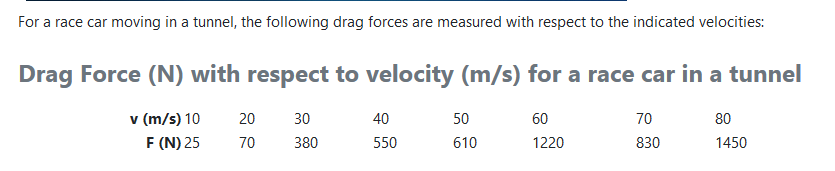
First we imported our data. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.DataFrame({'i':np.arange(1,9),'x':np.arange(10,90,10),
                      'y':[25,70,380,550,610,1220,830,1450]})
data.set_index('i', inplace=True)
data

,x,y
i,,
1,10,25
2,20,70
3,30,380
4,40,550
5,50,610
6,60,1220
7,70,830
8,80,1450


Let's graph our data

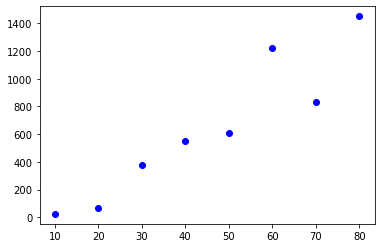

In [3]:
plt.plot(data.x,data.y,"ob")
plt.show()

## Least-squares fitting:
A nonlinear function of the form $y = \alpha_2 x^{\beta_2}$


we can convert it to a linear function $\log{y}=\log{\alpha} + \beta\log{x}$


and as the least square fit for a linear model given as $y' = a_0 + a_1 x'$ is:

$$a_1 = \frac{n\sum{x_i' y_i'} - \sum{x_i'}\sum{y_i'}}{n\sum{x_i'^2}-\left(\sum{x_i'}\right)^2}$$


$$a_0 = \bar{y}' - a_1\bar{x}'$$

and since $x_i' = \log{x_i},\;y_i' = \log{y_i}$:


In [4]:
n = data.shape[0]
xp = np.log(data.x)
yp = np.log(data.y)

a1 = (n*np.sum(xp*yp)-np.sum(xp)*np.sum(yp)) / (n*np.sum(xp**2) - np.sum(xp)**2)
a0 = np.mean(yp) - a1*np.mean(xp)

print("a0:",a0, "\na1:",a1)

a0: -1.2941260499535536 
a1: 1.9841762557640112


as $a_0 = \log{\alpha}\rightarrow \alpha = e^{a_0}$ and $a_1 x' = \beta\log{x}\rightarrow  \beta = a_1$

In [5]:
alpha = np.exp(a0)
beta = a1
print("alpha:",alpha,"\nbeta:",beta)

alpha: 0.2741373420132226 
beta: 1.9841762557640112


In [6]:
def fun(alpha, beta, x):
    return alpha*x**beta

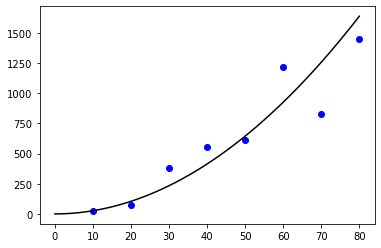

In [7]:
xx = np.linspace(0,80,100);
yy = fun(alpha,beta,xx)
plt.plot(data.x,data.y,"ob",xx,yy,"-k")
plt.show()

## Built-in minimization function:

In [8]:
def fun(alpha, beta, x):
    return alpha*x**beta

x = data.x
y = data.y
def error(params):
    e = y - fun(params[0],params[1],x)
    return np.sum(e**2)

from scipy.optimize import minimize

res = minimize(error,[0.274,1.98])
print(res)
alpha2,beta2 = res.x

      fun: 222604.84843969392
 hess_inv: array([[1.55651470e-09, 3.20791516e-09],
       [3.20791516e-09, 9.26210082e-09]])
      jac: array([0.00390625, 0.05078125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 129
      nit: 34
     njev: 43
   status: 2
  success: False
        x: array([2.53844123, 1.4358492 ])


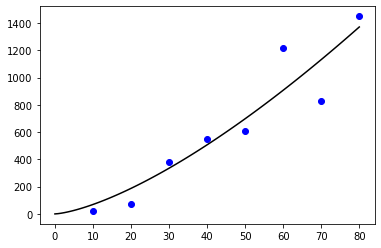

In [9]:
xx = np.linspace(0,80,100);
yy2 = fun(alpha2,beta2,xx)
plt.plot(data.x,data.y,"ob",xx,yy2,"-k")
plt.show()

### Let's compare the two methods

In [10]:
err_ls = error([alpha,beta])
err_min = error([alpha2,beta2])
print("Least-square sum of squares error:",err_ls)
print("Minimizer sum of squares error:",err_min)

Least-square sum of squares error: 345713.59440245194
Minimizer sum of squares error: 222604.84843969392


Let's plot the two graphs together

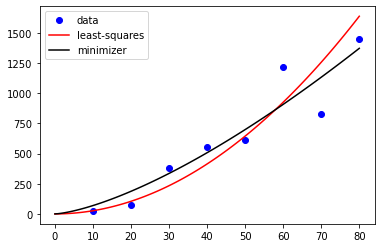

In [11]:
xx = np.linspace(0,80,100);
yy_ls = fun(alpha,beta,xx)
yy_min = fun(alpha2,beta2,xx)

plt.plot(data.x,data.y,"ob",xx,yy_ls,"-r",xx,yy_min,"-k")
plt.legend(["data","least-squares","minimizer"])
plt.show()

### Conclusion:
When we compared the two graphs and the error rates, we saw that the curve we found with the minimization method gave more accurate results.